# IMPORT DATA AND PACKAGES


In [803]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,GridSearchCV,validation_curve
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pydot 
import graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

data=pd.read_csv('challenger_global')
data=data.drop(['vilemaw_kills_team_1', 'vilemaw_kills_team_2'], axis=1)
print(data.shape)
data.head(10)

(5236, 87)


,win,first_blood,first_tower,first_inhibitor,first_baron,first_dragon,first_rift_herald,tower_kills_team_1,inhibitor_kills_team_1,baron_kills_team_1,...,cs_20m_bottom_duo_support_team_2,xp_20m_bottom_duo_support_team_2,damege_taken_20m_bottom_duo_support_team_2,kills_bottom_duo_carry_team_2,assists_bottom_duo_carry_team_2,deaths_bottom_duo_carry_team_2,gold_earned_20m_bottom_duo_carry_team_2,cs_20m_bottom_duo_carry_team_2,xp_20m_bottom_duo_carry_team_2,damege_taken_20m_bottom_duo_carry_team_2
0,1,2,2,1,0,1,2,6,1,0,...,1.8,361.8,866.7,3.0,7.0,4.0,439.5,5.3,452.9,803.7
1,2,2,2,2,2,1,2,4,0,0,...,1.2,452.8,675.5,7.0,8.0,9.0,438.7,7.6,485.4,592.4
2,2,1,2,2,2,1,2,2,0,0,...,1.2,402.9,962.1,9.0,16.0,5.0,575.7,7.3,538.8,772.6
3,2,1,2,2,2,2,2,2,0,0,...,1.7,359.9,651.5,4.0,14.0,10.0,559.0,6.6,397.7,748.5
4,2,2,2,2,2,1,2,3,0,0,...,1.5,313.6,592.6,4.0,10.0,3.0,423.3,7.6,555.9,536.8
5,1,1,0,1,1,1,1,9,4,1,...,1.2,282.4,489.7,5.0,5.0,6.0,463.3,9.5,494.1,896.7
6,2,1,0,2,1,2,2,5,0,1,...,1.2,309.2,699.9,7.0,15.0,4.0,421.9,8.7,439.5,668.3
7,2,2,2,0,2,2,2,0,0,0,...,1.0,434.1,850.9,6.0,14.0,2.0,540.9,6.8,587.9,625.4
8,1,2,2,1,1,2,2,9,1,1,...,2.1,264.3,468.5,2.0,6.0,8.0,365.3,7.4,449.0,645.7
9,2,2,0,1,2,2,1,6,1,0,...,0.4,444.2,606.9,6.0,7.0,4.0,499.1,7.3,566.4,737.1


# PREPROCESSING 1

Elimination des doublons

In [771]:
data=data.drop_duplicates()
print(data.shape)

(1672, 87)


Elimination des ligne avec des données erroné

In [772]:
kill=["kills_top_team_1","kills_top_team_2","kills_bottom_duo_support_team_2","kills_bottom_duo_support_team_1","kills_bottom_duo_carry_team_2","kills_bottom_duo_carry_team_1","kills_middle_team_1","kills_middle_team_2","kills_jungle_team_1","kills_jungle_team_2"]
k=[]
for i, row in data.iterrows():
    for j in kill:
        if (row[j] > 40):
            k.append(i)
            break
data=data.drop(k,axis=0).reindex()
print(data.shape)

(1070, 87)


Definiton train set, validation set, et test set.

Text(0.5, 1.0, 'Repartiton des initiaux')

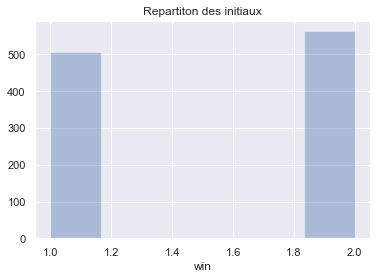

In [773]:
features = data.drop('win',axis='columns')
label = data["win"]
sns.distplot(label,kde =False,).set_title("Repartiton des initiaux")

(811,)


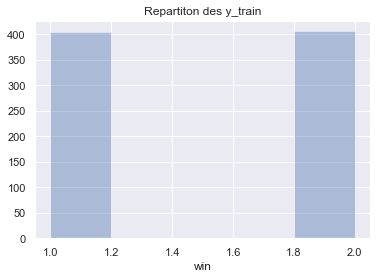

In [774]:
rus = RandomUnderSampler(random_state=0)
features, label = rus.fit_resample(features,label)
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=3)
sns.distplot(y_train,kde =False,).set_title("Repartiton des y_train")
print(y_train.shape)

(203,)


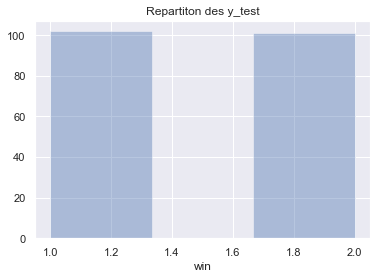

In [775]:
sns.distplot(y_test,kde =False,).set_title("Repartiton des y_test")
print(y_test.shape)

# DATA VISUALISATION

In [776]:
data.head(5)

,win,first_blood,first_tower,first_inhibitor,first_baron,first_dragon,first_rift_herald,tower_kills_team_1,inhibitor_kills_team_1,baron_kills_team_1,...,cs_20m_bottom_duo_support_team_2,xp_20m_bottom_duo_support_team_2,damege_taken_20m_bottom_duo_support_team_2,kills_bottom_duo_carry_team_2,assists_bottom_duo_carry_team_2,deaths_bottom_duo_carry_team_2,gold_earned_20m_bottom_duo_carry_team_2,cs_20m_bottom_duo_carry_team_2,xp_20m_bottom_duo_carry_team_2,damege_taken_20m_bottom_duo_carry_team_2
0,1,2,2,1,0,1,2,6,1,0,...,1.8,361.8,866.7,3.0,7.0,4.0,439.5,5.3,452.9,803.7
1,2,2,2,2,2,1,2,4,0,0,...,1.2,452.8,675.5,7.0,8.0,9.0,438.7,7.6,485.4,592.4
2,2,1,2,2,2,1,2,2,0,0,...,1.2,402.9,962.1,9.0,16.0,5.0,575.7,7.3,538.8,772.6
3,2,1,2,2,2,2,2,2,0,0,...,1.7,359.9,651.5,4.0,14.0,10.0,559.0,6.6,397.7,748.5
4,2,2,2,2,2,1,2,3,0,0,...,1.5,313.6,592.6,4.0,10.0,3.0,423.3,7.6,555.9,536.8


Text(0.5, 1.0, 'Repartion des victioires')

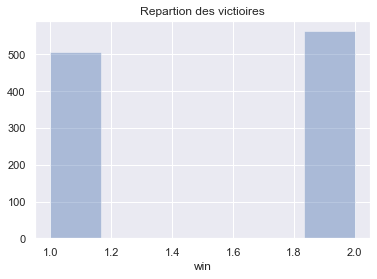

In [777]:
sns.distplot(data["win"],kde =False,).set_title("Repartion des victioires")

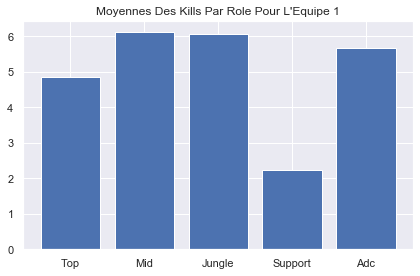

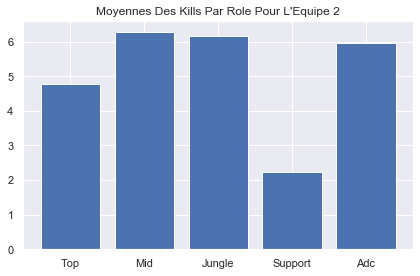

In [778]:
def meanplotter(d, a,s):
    mean = {}
    for y in d:
        if y in a:
            mean[y] = (d[y].mean(axis=0))
    keys=mean.keys()
    vals=mean.values()
    plt.title(s)
    plt.bar(["Top","Mid","Jungle","Support","Adc"],vals)
    plt.tight_layout()
    plt.show()

kill1=["kills_top_team_1","kills_jungle_team_1","kills_middle_team_1","kills_bottom_duo_carry_team_1","kills_bottom_duo_support_team_1"]
kill2=["kills_top_team_2","kills_jungle_team_2","kills_middle_team_2","kills_bottom_duo_carry_team_2","kills_bottom_duo_support_team_2"]


meanplotter(data,kill1,"Moyennes Des Kills Par Role Pour L'Equipe 1")
meanplotter(data,kill2,"Moyennes Des Kills Par Role Pour L'Equipe 2")

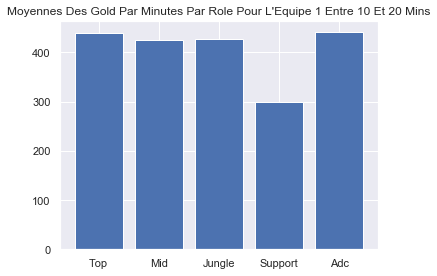

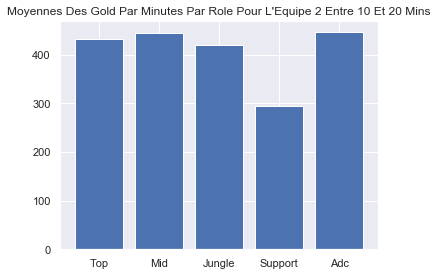

In [779]:
gold_earned1=["gold_earned_20m_top_team_1","gold_earned_20m_jungle_team_1","gold_earned_20m_middle_team_1","gold_earned_20m_bottom_duo_carry_team_1","gold_earned_20m_bottom_duo_support_team_1"]
gold_earned2=["gold_earned_20m_top_team_2","gold_earned_20m_jungle_team_2","gold_earned_20m_middle_team_2","gold_earned_20m_bottom_duo_carry_team_2","gold_earned_20m_bottom_duo_support_team_2"]

meanplotter(data,gold_earned1,"Moyennes Des Gold Par Minutes Par Role Pour L'Equipe 1 Entre 10 Et 20 Mins")
meanplotter(data,gold_earned2,"Moyennes Des Gold Par Minutes Par Role Pour L'Equipe 2 Entre 10 Et 20 Mins")

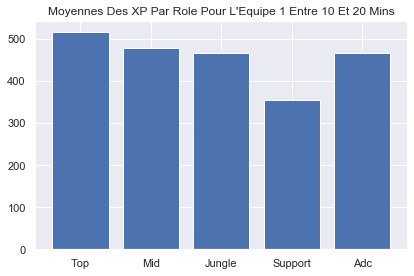

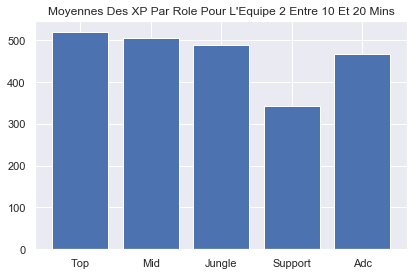

In [780]:
xp1=["xp_20m_top_team_1","xp_20m_jungle_team_1","xp_20m_middle_team_1","xp_20m_bottom_duo_carry_team_1","xp_20m_bottom_duo_support_team_1"]
xp2=["xp_20m_top_team_2","xp_20m_jungle_team_2","xp_20m_middle_team_2","xp_20m_bottom_duo_carry_team_2","xp_20m_bottom_duo_support_team_2"]

meanplotter(data,xp1,"Moyennes Des XP Par Role Pour L'Equipe 1 Entre 10 Et 20 Mins")
meanplotter(data,xp2,"Moyennes Des XP Par Role Pour L'Equipe 2 Entre 10 Et 20 Mins")

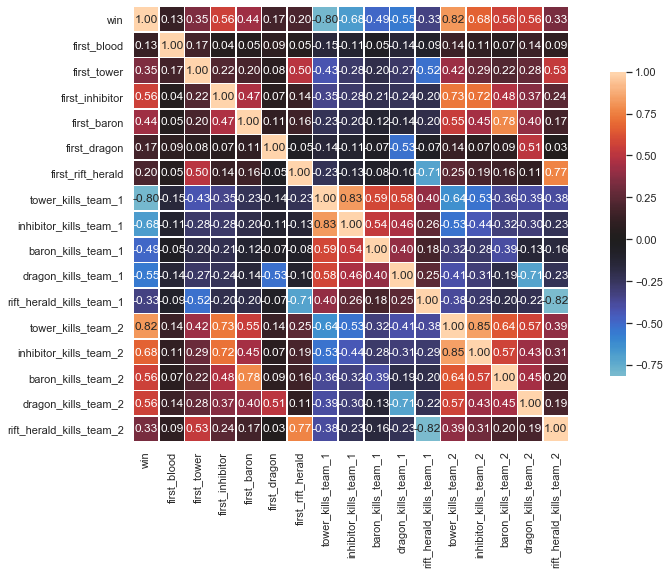

In [781]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.iloc[:, : 17].corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

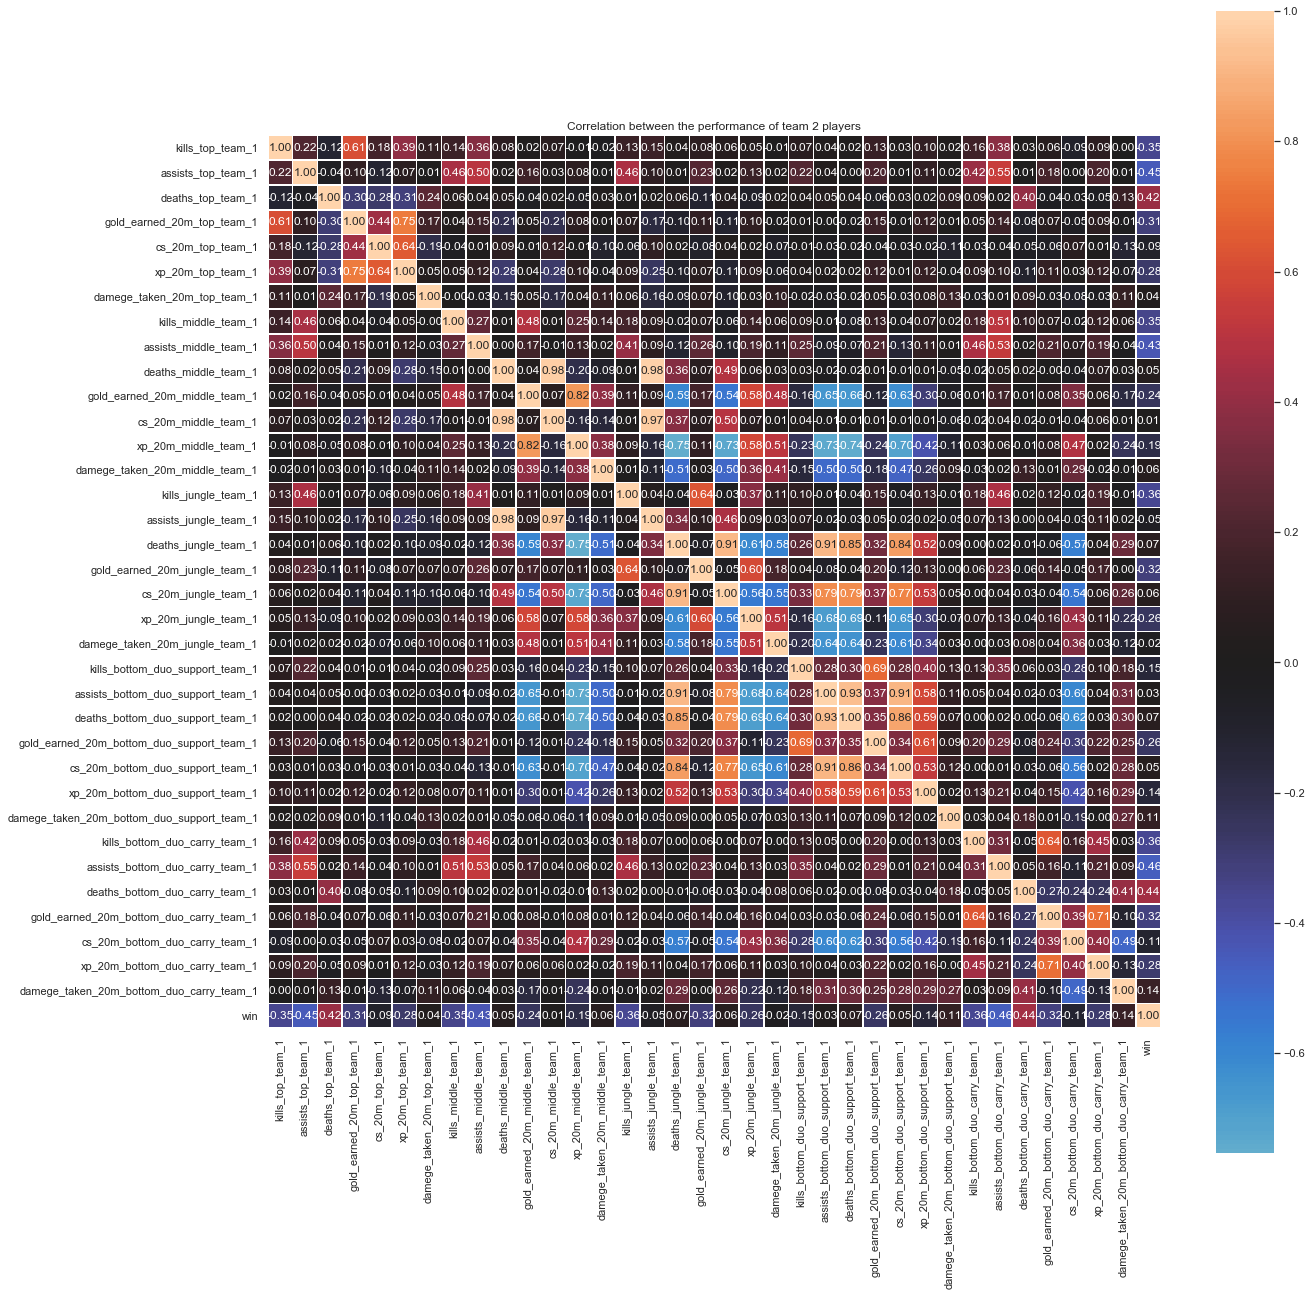

In [782]:
perf1 = data.iloc[:,17:52]
perf1['win'] = data['win']

plt.figure(figsize=(20,30))
plt.title("Correlation between the performance of team 2 players")
sns.heatmap(perf1.corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
)

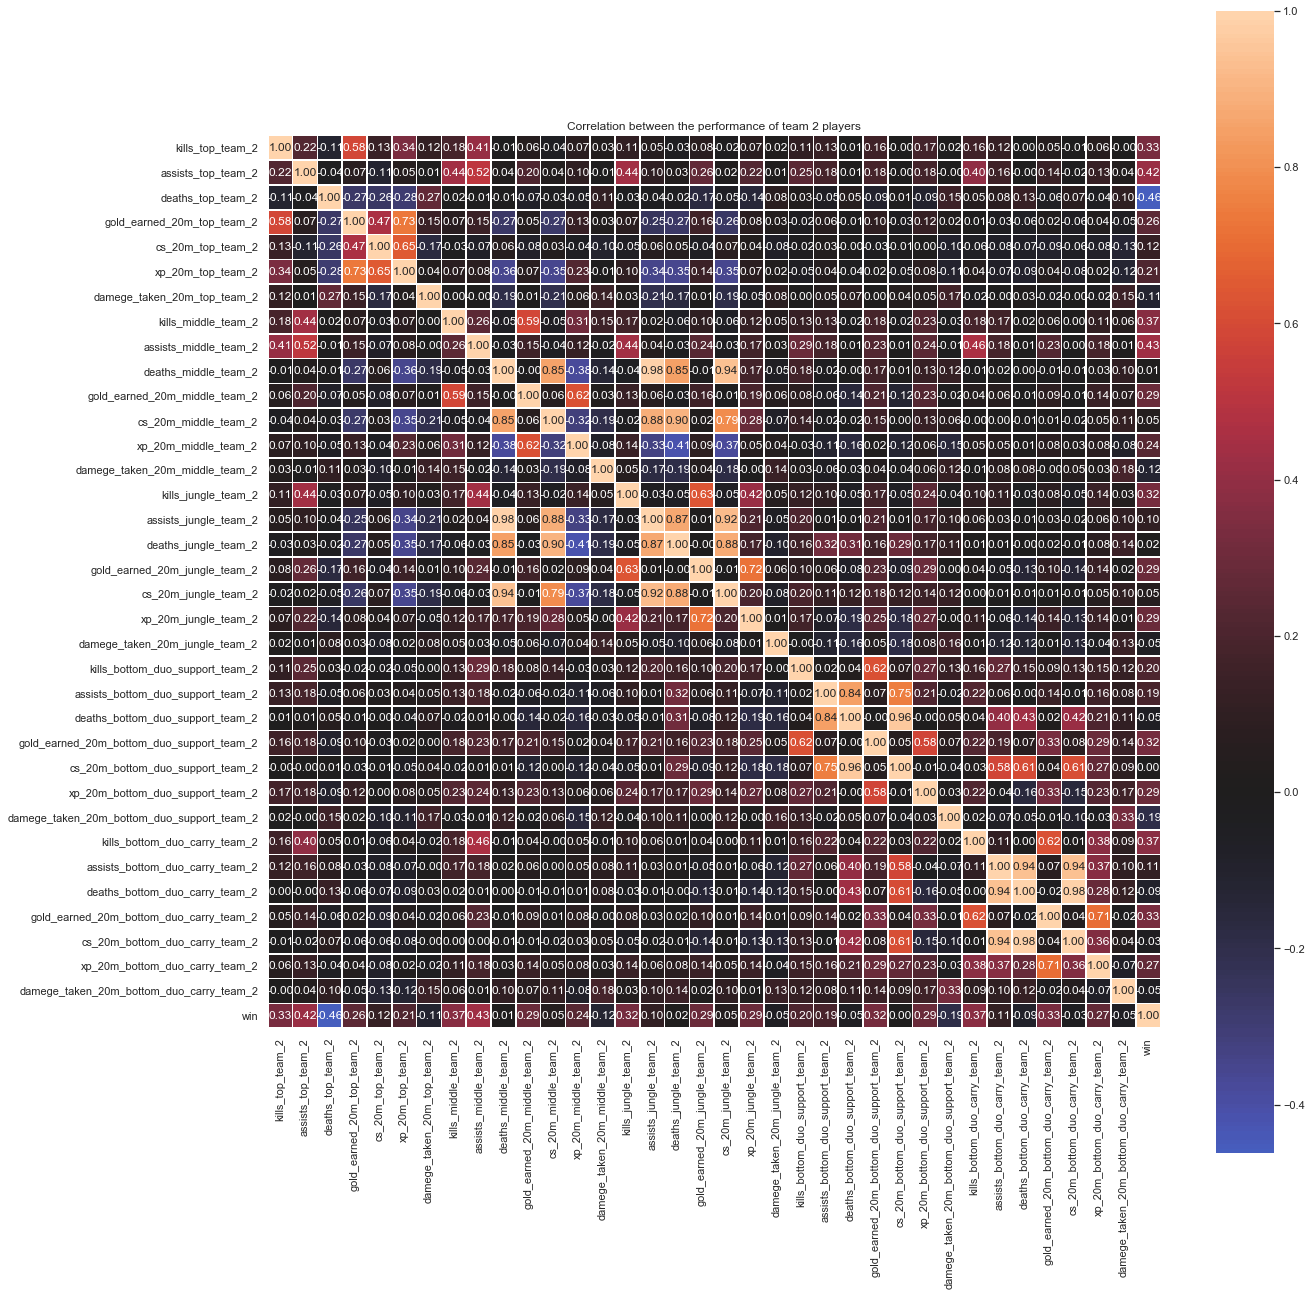

In [783]:
perf2 = data.iloc[:,52:88]
perf2['win'] = data['win']

plt.figure(figsize=(20,30))
plt.title("Correlation between the performance of team 2 players")
sns.heatmap(perf2.corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
)

# OPTIMISATIONS

## ARCHITECTURE

In [784]:
DTree= DecisionTreeClassifier(random_state=0)
DTree.fit(x_train,y_train)
print(DTree.score(x_test,y_test))


0.9605911330049262


In [785]:
cross_val_score(DTree,x_train,y_train,cv=6,scoring='accuracy').mean()

0.9407861292665215

## HYPER-PARAMETRES

In [786]:
#param_grid = {'max_depth':np.arange(1,10), #nombre maximal de profondeur de l'arbre
#             'max_features':np.arange(1,80),#nombre maximal de dimension utilisée
#             'criterion':['gini', 'entropy'],
#              'min_samples_split':[2, 5, 10, 15, 100],
#              'min_samples_leaf':[1, 2, 5, 10] 
#             }
#grid=GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid,cv=5)
#grid.fit(x_train, y_train)
#grid.best_score_
#grid.best_params_
#{'criterion': 'gini', 'max_depth': 5,'max_features': 60, 'min_samples_leaf': 5,'min_samples_split': 2}

In [787]:
FinalDTree=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features=60,min_samples_split=2,min_samples_leaf=5)
FinalDTree.fit(x_train,y_train)
print(FinalDTree.score(x_test,y_test))


0.9655172413793104


In [788]:
cross_val_score(FinalDTree,x_train,y_train,cv=6,scoring='accuracy').mean()

0.9481753812636166

[ 64  67  69  71  74  76  78  81  83  85  88  90  92  95  97  99 102 104
 106 109 111 113 116 118 121 123 125 128 130 132 135 137 139 142 144 146
 149 151 153 156 158 160 163 165 167 170 172 174 177 179 181 184 186 188
 191 193 195 198 200 202 205 207 210 212 214 217 219 221 224 226 228 231
 233 235 238 240 242 245 247 249 252 254 256 259 261 263 266 268 270 273
 275 277 280 282 284 287 289 291 294 296 299 301 303 306 308 310 313 315
 317 320 322 324 327 329 331 334 336 338 341 343 345 348 350 352 355 357
 359 362 364 366 369 371 373 376 378 380 383 385 388 390 392 395 397 399
 402 404 406 409 411 413 416 418 420 423 425 427 430 432 434 437 439 441
 444 446 448 451 453 455 458 460 462 465 467 469 472 474 477 479 481 484
 486 488 491 493 495 498 500 502 505 507 509 512 514 516 519 521 523 526
 528 530 533 535 537 540 542 544 547 549 551 554 556 558 561 563 566 568
 570 573 575 577 580 582 584 587 589 591 594 596 598 601 603 605 608 610
 612 615 617 619 622 624 626 629 631 633 636 638 64

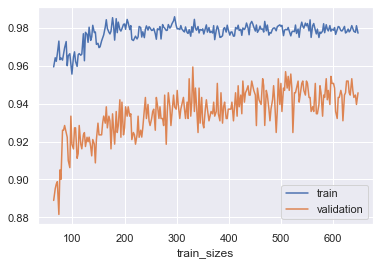

In [789]:
N,train_score,val_score = learning_curve(FinalDTree,x_train,y_train,train_sizes=np.linspace(0.1,1.0,250),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()


## PREPROCESSING 2

Normalization 

In [790]:
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)
FinalDTree.fit(x_train_norm,y_train)
print(FinalDTree.score(x_test_norm,y_test))


0.9507389162561576


STANDARDIZATION

In [791]:
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

for i in data.drop('win',axis='columns').columns :
        scale = StandardScaler().fit(x_train_stand[[i]])
        x_train_stand[i] = scale.transform(x_train_stand[[i]])
        x_test_stand[i] = scale.transform(x_test_stand[[i]])

DTree.fit(x_train_stand,y_train)
print(FinalDTree.score(x_test_stand,y_test))


0.896551724137931


PCA

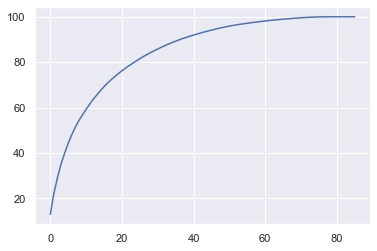

In [792]:
pca = PCA()
pca.fit(x_train_stand)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)


On atteint 94% de variance conservé a 60 features

In [793]:
pca=PCA(n_components=61) 
pca.fit(x_train_stand) 
x_pca=pca.transform(x_train_stand)
x_test_pca=pca.transform(x_test_stand)
x_pca.shape
DTree.fit(x_pca,y_train)
print(DTree.score(x_test_pca,y_test))


0.9261083743842364


In [794]:
selector = SelectKBest(chi2,k=60)
selector.fit_transform(x_train,y_train)
cols = selector.get_support(indices=True)
x_train = x_train.iloc[:,cols]
x_test = x_test.iloc[:,cols]
x_train.head(5)

,tower_kills_team_1,inhibitor_kills_team_1,baron_kills_team_1,dragon_kills_team_1,tower_kills_team_2,inhibitor_kills_team_2,baron_kills_team_2,dragon_kills_team_2,kills_top_team_1,assists_top_team_1,...,xp_20m_jungle_team_2,assists_bottom_duo_support_team_2,gold_earned_20m_bottom_duo_support_team_2,xp_20m_bottom_duo_support_team_2,damege_taken_20m_bottom_duo_support_team_2,kills_bottom_duo_carry_team_2,assists_bottom_duo_carry_team_2,deaths_bottom_duo_carry_team_2,gold_earned_20m_bottom_duo_carry_team_2,xp_20m_bottom_duo_carry_team_2
321,9,2,0,3,3,0,1,2,8,6,...,431.7,21.0,339.8,428.6,596.5,14.0,8.0,6.0,675.5,588.7
1010,3,0,0,1,8,1,1,3,1,4,...,571.4,12.0,271.1,316.8,171.3,5.0,8.0,2.0,454.4,383.1
350,8,1,1,3,4,0,0,2,3,7,...,410.0,13.0,234.2,330.1,627.3,2.0,4.0,8.0,290.0,347.3
757,4,0,0,1,8,2,1,4,5,5,...,573.2,30.0,277.5,348.0,42.5,5.0,10.0,3.0,345.1,387.2
527,4,0,0,2,9,1,1,3,3,11,...,594.7,12.0,312.7,289.0,678.3,6.0,9.0,4.0,468.0,481.4


# TEST

In [795]:
DTree= DecisionTreeClassifier(random_state=0)
DTree.fit(x_train,y_train)
print(DTree.score(x_test,y_test))

0.9655172413793104


In [796]:
cross_val_score(DTree,x_train,y_train,cv=6,scoring='accuracy').mean()

0.9383169934640523

In [797]:
FinalDTree.fit(x_train,y_train)
print(FinalDTree.score(x_test,y_test))

0.9704433497536946


In [798]:
cross_val_score(FinalDTree,x_train,y_train,cv=6,scoring='accuracy').mean()

0.9494099491648512

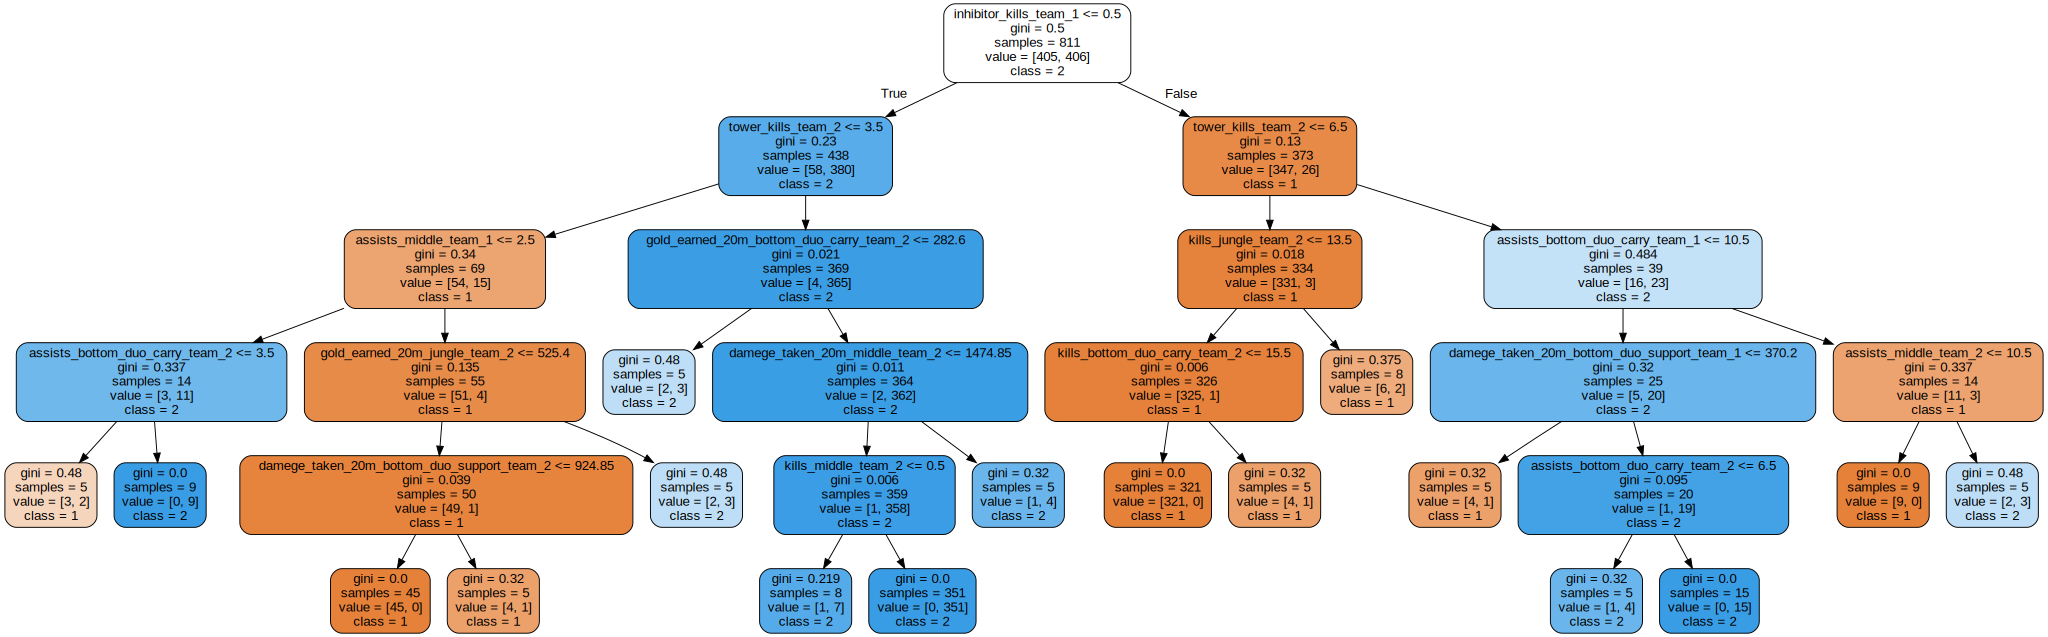

In [799]:
dot_data = tree.export_graphviz(FinalDTree, out_file=None, filled=True, rounded=True, feature_names=x_train.columns, class_names=["1","2"])
graph = graphviz.Source(dot_data)  
graph


# METRICS

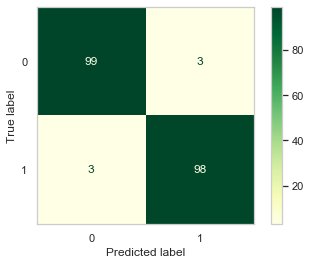

In [814]:
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(FinalDTree,x_test,y_test,display_labels=[0,1],cmap=plt.cm.YlGn)

In [815]:
print(classification_report(FinalDTree.predict(x_test),y_test))



              precision    recall  f1-score   support

           1       0.97      0.97      0.97       102
           2       0.97      0.97      0.97       101

    accuracy                           0.97       203
   macro avg       0.97      0.97      0.97       203
weighted avg       0.97      0.97      0.97       203

